In [15]:
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [16]:
df = pd.read_excel('Atanas_data/data1(SMD).xlsx')
df.head()

SMDVL     SMDDR     SMDVR     SMDDL  Head Curve (rad)  \
0  1.335285 -0.025508  1.212249 -0.429266         -0.497797   
1  1.093859 -0.091065  0.372434 -0.253458         -0.580070   
2  0.656907  0.025629  0.230419 -0.439002          0.054525   
3  0.501909  0.565031  0.677231 -0.220855          0.478702   
4  0.429759  0.174579  0.746304 -0.341995          0.702458   

   Pumping (pumps/sec)  Angular Velocity (rad/s)  Body Curvature (rad)  \
0             0.521262                 -0.106008              0.772148   
1             0.740741                 -0.100544              0.927859   
2             0.561167                 -0.091799              1.009937   
3             0.493827                 -0.070044              0.871521   
4             0.561167                 -0.044707              0.605583   

   Velocity (0.1 mm/s)  
0            -1.273702  
1            -0.986653  
2            -0.764604  
3            -1.273562  
4            -0.816781

In [17]:
X = df.iloc[:, :8]

# Use the fifth column as the target variable
y = df.iloc[:, 8]

# Divide the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

岭回归

In [18]:
# Define the parameter grid
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]}

# Create a Ridge regression model
ridge = Ridge()

ridge.fit(X_train, y_train)

y_pred = ridge.predict(X_test)

# Create the GridSearchCV object
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)

# Train the model with training data
ridge_regressor.fit(X_train, y_train)

# Output optimal parameters
print(ridge_regressor.best_params_)

# Output the MSE of the best model on the training set, the smaller the MSE value, the better the prediction.
print(f'Ridege:{ridge_regressor.best_score_}')

{'alpha': 10}
Ridege:-0.40699880467026456


Shape of y_test: (320,)
Shape of y_pred: (320,)


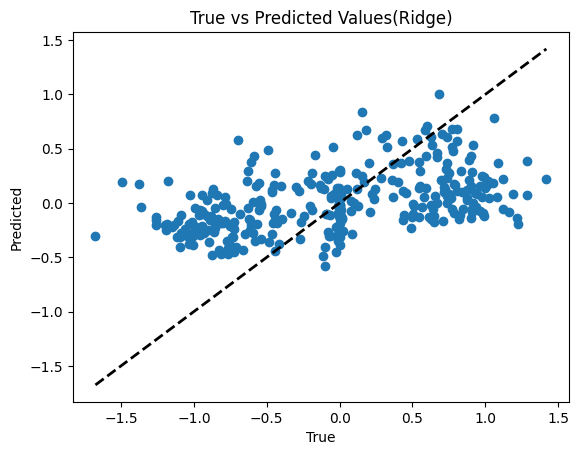

In [19]:
print("Shape of y_test:", y_test.shape)
print("Shape of y_pred:", y_pred.shape)
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('True')
plt.ylabel('Predicted')
plt.title('True vs Predicted Values(Ridge)')
plt.show()

支持向量回归

In [20]:
# Create SVR objects
svr = svm.SVR()

svr.fit(X_train, y_train)

y_pred = svr.predict(X_test)

parameters = {'kernel': ['linear', 'rbf'], 'C': [1, 10, 100], 'epsilon': [0.1, 0.2, 0.5]}

grid_svr = GridSearchCV(svr, parameters, cv=5)

grid_svr.fit(X_train, y_train)

print(grid_svr.best_params_)

predictions_svm = grid_svr.predict(X_test)

{'C': 10, 'epsilon': 0.2, 'kernel': 'rbf'}


In [21]:
predictions_svm = grid_svr.predict(X_test)

mse_svm = mean_squared_error(y_test, predictions_svm)

print(f'Mean Squared Error(MSE)(SVR): {mse_svm}')

Mean Squared Error(MSE)(SVR): 0.25418723046790226


Shape of y_test: (320,)
Shape of y_pred: (320,)


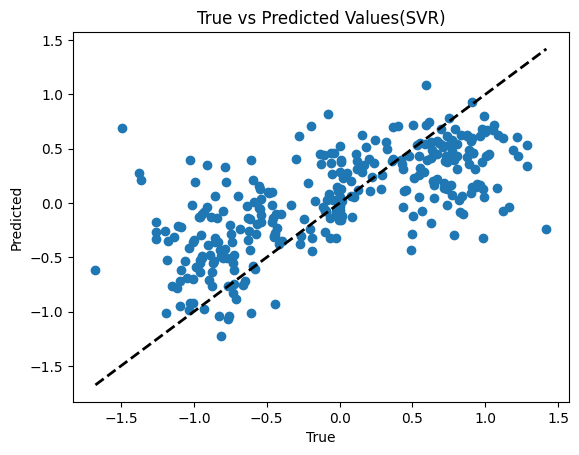

In [22]:
print("Shape of y_test:", y_test.shape)
print("Shape of y_pred:", y_pred.shape)
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('True')
plt.ylabel('Predicted')
plt.title('True vs Predicted Values(SVR)')
plt.show()

In [23]:
# Create BayesianRidge objects
bayes_ridge = linear_model.BayesianRidge()

bayes_ridge.fit(X_train, y_train)

y_pred = bayes_ridge.predict(X_test)

predictions = bayes_ridge.predict(X_test)

mse_bayes = mean_squared_error(y_test, predictions)

print(f'Mean Squared Error(Bayes): {mse_bayes}')

Mean Squared Error(Bayes): 0.40454658331573246


Shape of y_test: (320,)
Shape of y_pred: (320,)


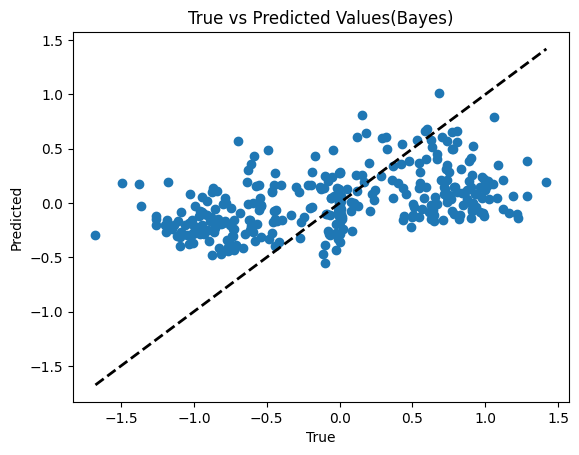

In [24]:
print("Shape of y_test:", y_test.shape)
print("Shape of y_pred:", y_pred.shape)
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('True')
plt.ylabel('Predicted')
plt.title('True vs Predicted Values(Bayes)')
plt.show()

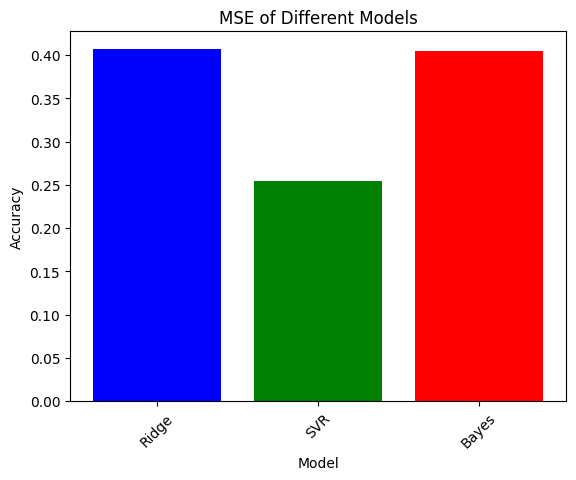

In [25]:
accuracy_scores = {'Ridge': abs(ridge_regressor.best_score_), 'SVR': abs(mse_svm), 'Bayes': abs(mse_bayes)}

# Creating a Bar Chart
plt.bar(accuracy_scores.keys(), accuracy_scores.values(), color=['blue', 'green', 'red'])
plt.xticks(rotation=45)

plt.title('MSE of Different Models')
plt.xlabel('Model')
plt.ylabel('Accuracy')

plt.show()